In [8]:
import random
import time
import matplotlib.pyplot as plt

### generateRandomJobs() function provides us N number of jobs randomly within a defined range. Job Tuples are defined as (job_id,deadline,profit) 

In [9]:
def generateRandomJobs(n):
    
    jobs = []

    for i in range(n):
        job_id = random.randint(1,1000)
        deadline = random.randint(1, 2000)
        profit = random.randint(0,500)
        job_tuple = (job_id, deadline, profit)
        jobs.append(job_tuple)

    return jobs

In [10]:
def getJobProfit(job):
    return job[2]

def getJobDeadline(job):
    return job[1]

## Dynamic Programming Algorithm with Bottom up approach for job Scheduling

In [11]:
def jobSchedulingWithDynamicProgramming(jobs):
    # Sort jobs in descending order based on profits
    jobs.sort(key=getJobProfit, reverse=True)

    
    # getting the maximum deadline
    maxDeadline = max(jobs, key=getJobDeadline)[1]  
    dynamic = [0] * (maxDeadline+1)
    #createing job sequence with max deadline
    jobSequence = [''] * (maxDeadline+1)

    # Traverse through jobs
    for job in jobs:
        deadline = job[1]
        profit = job[2]

        # Find the earliest available slot for the current job
        while deadline > 0 and dynamic[deadline] != 0:
            deadline -= 1

        # Update dp and job_sequence lists
        if deadline > 0:
            dynamic[deadline] = profit
            jobSequence[deadline] = job[0]

    # Find the maximum profit and corresponding job sequence
    maxProfit = sum(dynamic)
    maxJobSequence = []
    for job in jobSequence:
        if job != '':
            maxJobSequence.append(job)

    return maxProfit, maxJobSequence

#### resultOfAlgorithm() takes the numberOfJobs and timeRequired Lists to plot the graph where numberOfJobs are plotted in X-axis and timeRequired for corresponding number of jobs are plotted in Y-axis

In [12]:
def resultOfAlgorithm(numberOfJobs,timeRequired):
    #plotting the graph
    plt.plot(numberOfJobs,timeRequired)
    
    plt.xlabel("Number Of Jobs")
    plt.ylabel("Time Required")
    plt.title("Job Scheduling with Dynamic Programming Algorithm")
    plt.show()

Tested for large number of Jobs. numberOfJobs=5000,100000

Note: Enter 0 to end the program and generate Results
5000
Max profit will be: 804371
Job sequence of Execution will be: [916, 801, 304, 102, 285, 735, 219, 947, 655, 621, 621, 635, 928, 727, 495, 851, 887, 35, 822, 91, 721, 983, 717, 155, 873, 646, 893, 778, 558, 201, 984, 335, 197, 221, 915, 196, 841, 281, 114, 421, 963, 237, 249, 446, 714, 512, 13, 916, 304, 702, 826, 909, 892, 714, 381, 159, 100, 473, 722, 706, 629, 475, 483, 672, 12, 245, 471, 954, 594, 452, 42, 234, 524, 770, 89, 714, 362, 751, 983, 425, 445, 213, 368, 162, 131, 834, 290, 149, 877, 153, 901, 390, 775, 895, 75, 236, 956, 375, 669, 627, 860, 114, 209, 436, 108, 895, 589, 411, 922, 374, 116, 746, 990, 526, 362, 275, 922, 826, 429, 586, 331, 926, 652, 256, 53, 25, 61, 947, 619, 214, 44, 807, 233, 364, 291, 19, 448, 524, 879, 130, 13, 886, 57, 982, 130, 915, 771, 199, 393, 769, 527, 89, 517, 470, 648, 943, 917, 381, 751, 547, 652, 570, 952, 310, 900, 71, 647, 43, 637, 369, 380, 806, 735, 145, 500, 693, 398, 926, 191, 

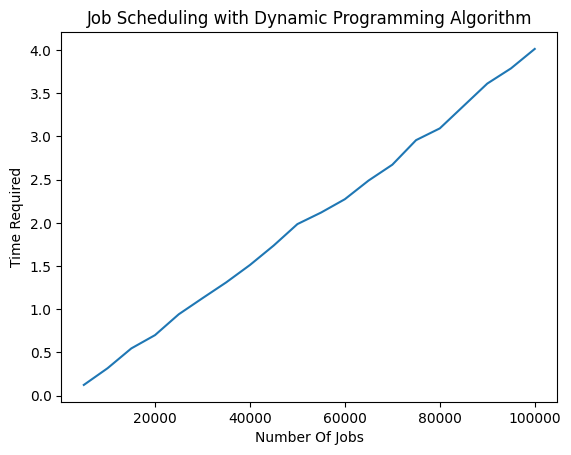

In [13]:
print("Note: Enter 0 to end the program and generate Results")

#initializing matrix for number of jobs and time required
listNumber0fJobs=[]
timeRequired=[]

while True:
    #Enter number of jobs you want to generate
    numberOfJobs=int(input("Enter the number of jobs you want to generate: "))
    if(numberOfJobs==0):
        resultOfAlgorithm(numberOfJobs=listNumber0fJobs,timeRequired=timeRequired)
        break
    print(numberOfJobs)
    listNumber0fJobs.append(numberOfJobs)

    #Generate random jobs using functions
    jobs=generateRandomJobs(numberOfJobs)
    
    startOfExecution=time.time()
    #implementing brute force Algorithm
    maxProfit,jobSequence=jobSchedulingWithDynamicProgramming(jobs=jobs)
    print(f"Max profit will be: {maxProfit}")
    print(f"Job sequence of Execution will be: {jobSequence}")
    endOfExecution=time.time()
    timeRequired.append(round(endOfExecution-startOfExecution,4))